# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

## Get the Data

In [4]:
df = pd.read_csv('data/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# 1. Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [8]:
df['Clicked on Ad'].value_counts(normalize=True)

0    0.5
1    0.5
Name: Clicked on Ad, dtype: float64

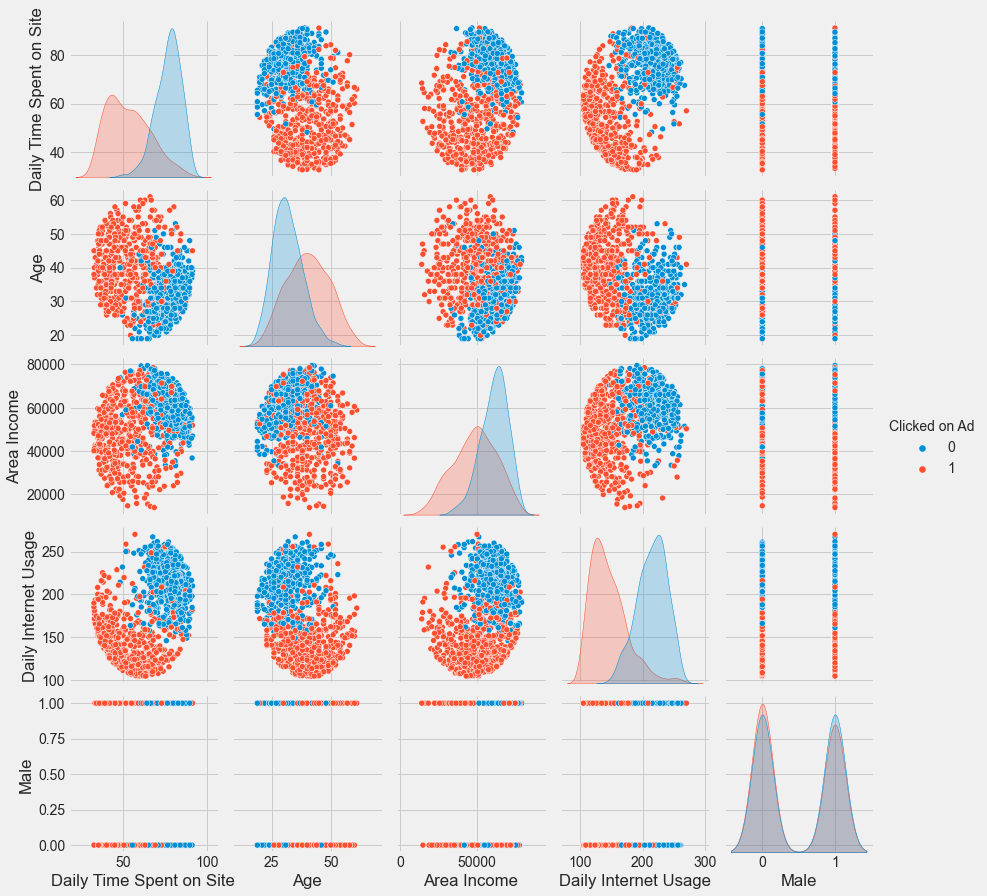

In [11]:
sns.pairplot(df, hue="Clicked on Ad")

<AxesSubplot:>

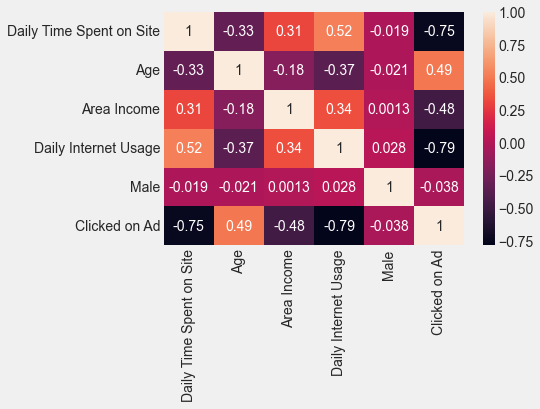

In [12]:
sns.heatmap(df.corr(), annot=True)

# 2. Prepare Data for Logistic Regression



#### 1. Feature engineering


In [22]:
df[df['Clicked on Ad']==1].head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Age40,Age30
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1,0,0
10,47.64,49,45632.51,122.02,Centralized neutral neural-net,West Brandonton,0,Qatar,2016-03-16 20:19:01,1,0,0
12,69.57,48,51636.92,113.12,Centralized content-based focus group,West Katiefurt,1,Egypt,2016-06-03 01:14:41,1,0,0
14,42.95,33,30976.00,143.56,Grass-roots coherent extranet,West William,0,Barbados,2016-03-24 09:31:49,1,1,0
15,63.45,23,52182.23,140.64,Persistent demand-driven interface,New Travistown,1,Spain,2016-03-09 03:41:30,1,1,1


In [16]:
df['Age30'] = np.where(df['Age']<30 , 1, 0)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Age40,Age30
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,1,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,1,1
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,1,0


<AxesSubplot:>

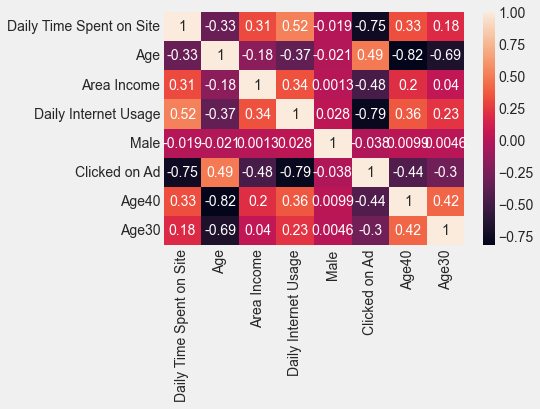

In [17]:
sns.heatmap(df.corr(), annot=True)

In [21]:
print(df['Ad Topic Line'].nunique())
print(df['Country'].nunique())
print(df['City'].nunique())

1000
237
969


In [23]:
df['palabra_challenge'] = np.where(df['Ad Topic Line'].str.contains('challenge'), 1, 0)
df[df['palabra_challenge']==1]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Age40,Age30,palabra_challenge
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1,0,0,1
113,46.13,46,37838.72,123.64,Horizontal hybrid challenge,New Rachel,1,Guyana,2016-01-09 05:44:56,1,0,0,1
312,75.55,22,41851.38,169.40,Upgradable even-keeled challenge,New Amanda,0,Taiwan,2016-02-19 07:29:30,1,1,1,1
317,73.38,25,53058.91,236.19,Horizontal transitional challenge,South Corey,1,French Southern Territories,2016-04-21 09:30:35,0,1,1,1
480,57.11,22,59677.64,207.17,Self-enabling tertiary challenge,Lake Jonathanview,1,Dominican Republic,2016-06-07 23:46:51,0,1,1,1
669,62.18,33,65899.68,126.44,Reactive impactful challenge,West Leahton,0,Hungary,2016-05-20 00:00:48,1,1,0,1
735,83.91,29,53223.58,222.87,Distributed bifurcated challenge,Haleberg,0,Burundi,2016-01-04 22:27:25,0,1,1,1
957,69.95,28,56725.47,247.01,Horizontal even-keeled challenge,New Julie,0,Malta,2016-04-28 01:24:34,0,1,1,1
985,72.88,44,64011.26,125.12,Customer-focused explicit challenge,Sarahland,0,Yemen,2016-04-21 19:56:24,1,0,0,1


In [26]:
df['Ad Topic Line'].str.split(' ')

0         [Cloned, 5thgeneration, orchestration]
1         [Monitored, national, standardization]
2           [Organic, bottom-line, service-desk]
3      [Triple-buffered, reciprocal, time-frame]
4              [Robust, logistical, utilization]
                         ...                    
995            [Fundamental, modular, algorithm]
996          [Grass-roots, cohesive, monitoring]
997             [Expanded, intangible, solution]
998     [Proactive, bandwidth-monitored, policy]
999          [Virtual, 5thgeneration, emulation]
Name: Ad Topic Line, Length: 1000, dtype: object

In [27]:
df['City']

0         Wrightburgh
1           West Jodi
2            Davidton
3      West Terrifurt
4        South Manuel
            ...      
995         Duffystad
996       New Darlene
997     South Jessica
998       West Steven
999       Ronniemouth
Name: City, Length: 1000, dtype: object

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df['City'])

df['City_encoded'] = le.transform(df['City'])

df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Age40,Age30,palabra_challenge,City_encoded
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,1,0,0,961
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,0,0,903
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,1,1,0,111
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1,1,0,939
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,1,0,0,805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,1,0,0,126
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,0,0,0,488
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,0,0,0,798
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,1,1,0,935


In [33]:
pd.get_dummies(df['Country'])

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica (the territory South of 60 deg S),Antigua and Barbuda,Argentina,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['month'] = df['Timestamp'].dt.month
df['hour'] = df['Timestamp'].dt.hour
df['weekday'] = df['Timestamp'].dt.weekday
df['day'] = df['Timestamp'].dt.day
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Age40,Age30,palabra_challenge,City_encoded,month,hour,weekday,day
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,1,0,0,961,3,0,6,27
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,0,0,903,4,1,0,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,1,1,0,111,3,20,6,13
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1,1,0,939,1,2,6,10
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,1,0,0,805,6,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,1,0,0,126,2,21,3,11
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,0,0,0,488,4,2,4,22
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,0,0,0,798,2,17,0,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,1,1,0,935,3,2,3,24


<AxesSubplot:>

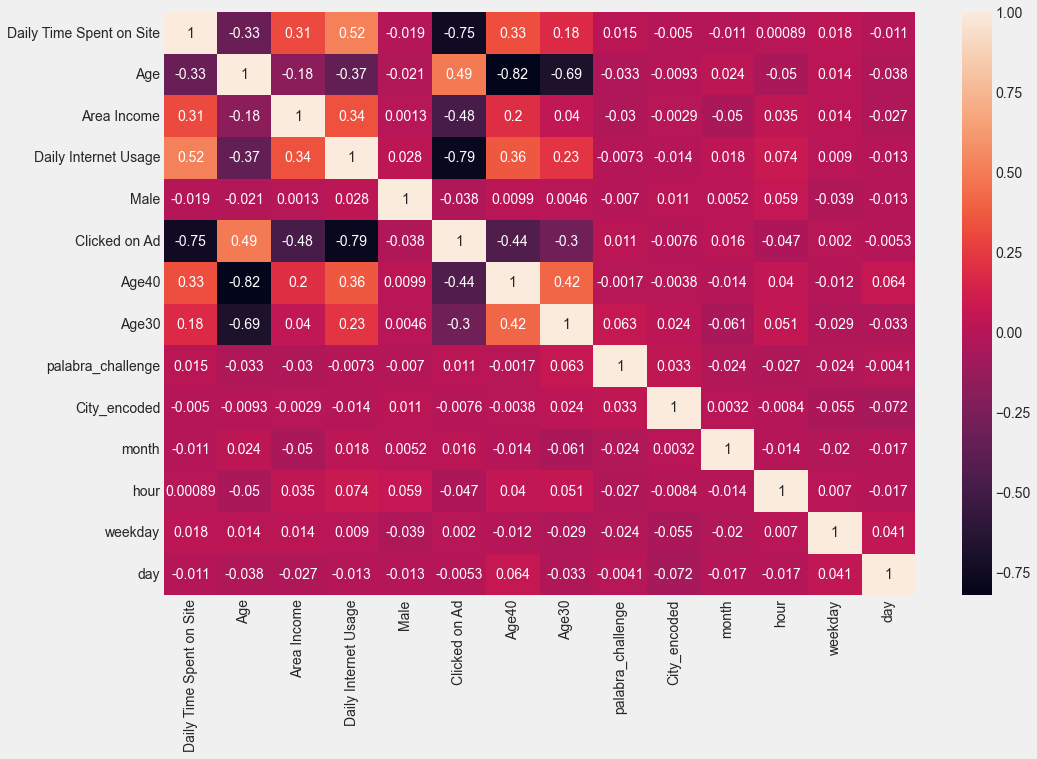

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)


#### 2. Train test split


In [38]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
y = df['Clicked on Ad']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 4)
(200, 4)
(800,)
(200,)



#### 3. StandardScaler()


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [44]:
scaler.inverse_transform(X_train_scal)

array([[7.327000e+01, 2.800000e+01, 6.730139e+04, 2.162400e+02],
       [5.156000e+01, 4.600000e+01, 6.310219e+04, 1.248500e+02],
       [5.630000e+01, 4.900000e+01, 6.743096e+04, 1.352400e+02],
       ...,
       [7.394000e+01, 2.600000e+01, 5.541106e+04, 2.361500e+02],
       [7.864000e+01, 3.100000e+01, 6.028347e+04, 2.352800e+02],
       [4.206000e+01, 3.400000e+01, 4.324119e+04, 1.315500e+02]])

# 3. Implement a Logistic Regression in Scikit-Learn and predict. Use cross validation.

In [45]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scal, y_train)

LogisticRegression()

In [46]:
from sklearn.model_selection import cross_val_score

log_reg_cv = LogisticRegression()

cv_results = cross_val_score(log_reg_cv, X_train_scal, y_train, cv=5, scoring="accuracy")

In [47]:
cv_results

array([0.96875, 0.94375, 0.98125, 0.95625, 0.98125])

In [48]:
cv_results.mean()

0.9662499999999999

In [49]:
cv_results.std()

0.014577379737113235

# 4. Evaluation


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [51]:
y_pred = log_reg.predict(X_test_scal)

In [ ]:
c_mat = confusion_matrix(y_test, y_pred, normalize = 'true')
c_mat

array([[0.99074074, 0.00925926],
       [0.0326087 , 0.9673913 ]])

In [52]:
accuracy_score(y_test, y_pred)

0.98


#### 1. Confusion Matrix


In [57]:
c_mat = confusion_matrix(y_test, y_pred, normalize = 'true')
c_mat

array([[0.99074074, 0.00925926],
       [0.0326087 , 0.9673913 ]])

In [54]:
(107 + 89) / (107 + 89 + 1 + 3)

0.98

<AxesSubplot:>

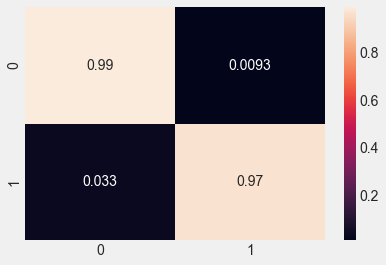

In [58]:
sns.heatmap(c_mat, annot=True)


#### 2. Precision


In [59]:
c_mat = confusion_matrix(y_test, y_pred)
c_mat

array([[107,   1],
       [  3,  89]], dtype=int64)

TP/(TP+FP)

In [60]:
89/(89 + 1)

0.9888888888888889

In [64]:
p = precision_score(y_test,y_pred)
p

0.9888888888888889



#### 3. Recall


TP/(TP+FN)

In [62]:
89/(89+3)

0.967391304347826

In [65]:
r = recall_score(y_test,y_pred)
r

0.967391304347826



#### 4. F1 Score


2 * precision * recall / (precision + recall)

In [66]:
2 * p * r / (p + r)

0.978021978021978

In [67]:
f1_score(y_test, y_pred)

0.978021978021978



#### 5. ROC curve

In [68]:
roc_auc_score(y_test, y_pred)

0.9790660225442834

In [71]:
y_pred_proba = log_reg.predict_proba(X_test_scal)
y_pred_proba

array([[9.71313384e-01, 2.86866158e-02],
       [9.84732451e-01, 1.52675492e-02],
       [9.92174854e-01, 7.82514647e-03],
       [6.49223890e-04, 9.99350776e-01],
       [9.62620694e-01, 3.73793055e-02],
       [1.81672373e-05, 9.99981833e-01],
       [4.00962090e-04, 9.99599038e-01],
       [1.39025872e-04, 9.99860974e-01],
       [9.91603883e-01, 8.39611700e-03],
       [1.07185113e-01, 8.92814887e-01],
       [9.91158334e-01, 8.84166612e-03],
       [8.16125148e-01, 1.83874852e-01],
       [2.91690468e-04, 9.99708310e-01],
       [9.92154706e-01, 7.84529351e-03],
       [9.57947856e-01, 4.20521438e-02],
       [9.48341453e-01, 5.16585470e-02],
       [2.31316347e-03, 9.97686837e-01],
       [9.88254189e-01, 1.17458107e-02],
       [1.00678883e-04, 9.99899321e-01],
       [9.93449660e-01, 6.55034032e-03],
       [9.67979820e-01, 3.20201803e-02],
       [9.58188866e-01, 4.18111345e-02],
       [9.91073055e-01, 8.92694468e-03],
       [9.35674598e-01, 6.43254018e-02],
       [3.933832

In [72]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])


Text(0, 0.5, 'True positive rate')

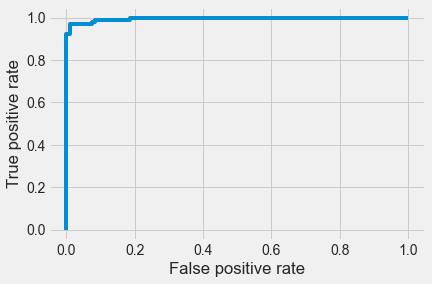

In [75]:
plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")



#### 6. P-R curve

In [76]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])

In [78]:
thresholds

array([0.08403867, 0.08902957, 0.09257543, 0.09666638, 0.097511  ,
       0.10038035, 0.1075405 , 0.11834532, 0.12588388, 0.14508644,
       0.16557064, 0.18387485, 0.18946342, 0.20133097, 0.20760222,
       0.23504295, 0.3059493 , 0.32272044, 0.33267427, 0.42855247,
       0.43387196, 0.43769698, 0.53351516, 0.57130262, 0.73217208,
       0.76077602, 0.7879659 , 0.81565203, 0.88053272, 0.89083278,
       0.89281489, 0.90982192, 0.9138384 , 0.93348077, 0.95272042,
       0.95998276, 0.96326777, 0.97099074, 0.97229677, 0.97316412,
       0.97591748, 0.98801255, 0.99207157, 0.99246667, 0.99304312,
       0.99404366, 0.99422512, 0.99454002, 0.99569833, 0.99589067,
       0.99606617, 0.99628401, 0.99658137, 0.99670109, 0.99675501,
       0.9971252 , 0.99736143, 0.99747336, 0.99752621, 0.99768684,
       0.99776397, 0.99798142, 0.99800444, 0.99802155, 0.99829534,
       0.9984926 , 0.99878569, 0.99906264, 0.99915764, 0.99925337,
       0.99935078, 0.99947823, 0.99958415, 0.99959564, 0.99959

Text(0, 0.5, 'Recall')

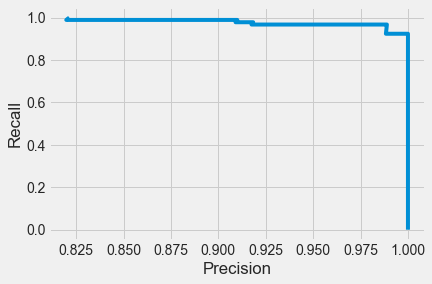

In [77]:
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")